# Read the file 

In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
%time df = pd.read_csv('dublin_2012_week1.csv',dtype={ 'Journey_Pattern_ID': object})
df.dtypes

<string>:2: DtypeWarning: Columns (1,13) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: user 15.8 s, sys: 6.05 s, total: 21.9 s
Wall time: 42 s


Timestamp               int64
Line_ID                object
Direction               int64
Journey_Pattern_ID     object
Date                   object
Vehicle_Journey_ID      int64
Operator               object
Congestion              int64
Lon_WGS84             float64
Lat_WGS84             float64
Delay                   int64
Block_ID                int64
Vehicle_ID              int64
Stop_ID                object
At_Stop                 int64
Distance                int64
Trip_Time               int64
datetime               object
HourOfDay               int64
day_of_week            object
midweek                 int64
dtype: object

In [3]:
df.head(1)

,Timestamp,Line_ID,Direction,Journey_Pattern_ID,Date,Vehicle_Journey_ID,Operator,Congestion,Lon_WGS84,Lat_WGS84,...,Block_ID,Vehicle_ID,Stop_ID,At_Stop,Distance,Trip_Time,datetime,HourOfDay,day_of_week,midweek
0,1352196906,1,0,00010001,2012-11-06,5425,RD,0,-6.26195,53.391151,...,1001,33494,226,1,0,0,2012-11-06 10:15:06,10,Tuesday,0


In [4]:
df.drop(df.columns[[0,1,2,6,7,10,11,12]], axis=1, inplace=True)
df.head(3)

,Journey_Pattern_ID,Date,Vehicle_Journey_ID,Lon_WGS84,Lat_WGS84,Stop_ID,At_Stop,Distance,Trip_Time,datetime,HourOfDay,day_of_week,midweek
0,00010001,2012-11-06,5425,-6.261950,53.391151,226,1,0,0,2012-11-06 10:15:06,10,Tuesday,0
1,00010001,2012-11-06,5425,-6.262341,53.391186,226,0,26,330,2012-11-06 10:20:36,10,Tuesday,0
2,00010001,2012-11-06,5425,-6.257599,53.391567,228,0,418,392,2012-11-06 10:21:38,10,Tuesday,0


In [5]:
df.shape

(3028113, 13)

# LinearRegression With All data set 

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [7]:
feature_cols = ['Distance','midweek','HourOfDay']
X = df[feature_cols]
y = df['Trip_Time']
X.columns

Index(['Distance', 'midweek', 'HourOfDay'], dtype='object')

In [8]:
y.shape

(3028113,)

In [9]:
degrees = [1,2]

#plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X, y)
    # MAE:  Mean Absolute Error 
    score=pipeline.score(X,y)
    print("The R2 score of the model is ",score )
    mae = abs(y-pipeline.predict(X)).mean()
    print("Mean Absolute Error of degree",degrees[i]," is ",mae)

The R2 score of the model is  0.785186342919
Mean Absolute Error of degree 1  is  465.24207293
The R2 score of the model is  0.803195856605
Mean Absolute Error of degree 2  is  448.044523944


In [17]:
polynomial_features = PolynomialFeatures(degree=4,include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
%time pipeline.fit(X, y)

#df.plot(kind='scatter', x='Distance', y='Trip_Time',label="Samples")
#plt.plot(X['Distance'], pipeline.predict(X), c='Blue', label="Model")

#plt.savefig('Linear_Reg_Poly.png')

CPU times: user 16.2 s, sys: 36.2 s, total: 52.4 s
Wall time: 2min 49s


Pipeline(steps=[('polynomial_features', PolynomialFeatures(degree=4, include_bias=False, interaction_only=False)), ('linear_regression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [11]:
pipeline.named_steps['linear_regression'].get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}

In [12]:
pipeline.score(X,y)

0.81213979549023552

In [13]:
# MSE: Mean Squared Error
mse=((y-pipeline.predict(X))**2).mean()
print("\n Mean Squared Error",mse)


 Mean Squared Error 360855.044804


In [14]:
# MAE:  Mean Absolute Error 
mae = abs(y-pipeline.predict(X)).mean()
print("Mean Absolute Error ",mae)

Mean Absolute Error  432.160800263


In [15]:
#Pickle the model of linear regression for all data set 
pickle.dump(pipeline.named_steps['linear_regression'], open('linear_model.sav', 'wb'))

In [16]:
#pipeline.get_params()

# Train all data set with Random Forest 

In [18]:
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
#sklearn.ensemble.RandomForestRegressor
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import Imputer
from sklearn.multioutput import MultiOutputRegressor
max_depth = 30
regr_rf = RandomForestRegressor(max_depth=max_depth,random_state=2)

In [19]:
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
#sklearn.ensemble.RandomForestRegressor
max_depth = 30
regr_rf = RandomForestRegressor(max_depth=max_depth,random_state=2)
# Prepare the descriptive features
X = pd.concat([df[['Distance','midweek','HourOfDay']]], axis=1)
y = df.Trip_Time 

#print("Descriptive features:\n", X)
#print("\nTarget feature:\n", y)

In [20]:
%time regr_rf.fit(X,y)

CPU times: user 1min 30s, sys: 3.82 s, total: 1min 34s
Wall time: 2min 14s


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=2,
           verbose=0, warm_start=False)

In [21]:
regr_rf.get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': 30,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_split': 1e-07,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 2,
 'verbose': 0,
 'warm_start': False}

In [22]:
regr_rf.score(X,y)

0.87160365813087737

In [39]:
# MAE:  Mean Absolute Error 

# Mean Absolute Error  of linear:  253.761443277
mae = abs(y-regr_rf.predict(X)).mean()
print("Mean Absolute Error of RF ",mae)

Mean Absolute Error of RF  353.194979583


In [40]:
# Pickle the Random Forest model 
pickle.dump(regr_rf, open('rf_modle.sav', 'wb'))

In [41]:
y_regr_rf=regr_rf.predict(X)

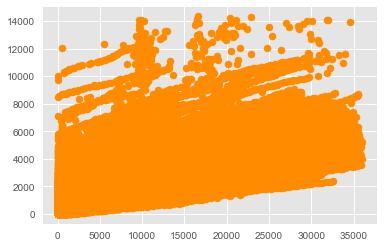

In [42]:
#plt.scatter(X['Distance'],y,color='blue', lable='Data')
#plt.plot(X['Distance'],y_regr_rf, color='red', lable='Random Forest')

plt.scatter(X['Distance'], y, color='darkorange', label='data')
plt.savefig('RF_result.png')


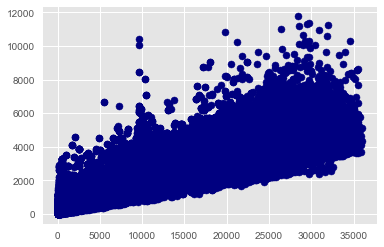

In [43]:
plt.scatter(X['Distance'], y_regr_rf, color='navy', label='MRF model')
#plt.get_backend()

# Randow Forest Train all data with Journey Pattern ID

In [44]:
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
#sklearn.ensemble.RandomForestRegressor
max_depth = 30
regr_rf = RandomForestRegressor(max_depth=max_depth,random_state=2)
# Prepare the descriptive features
X = pd.concat([df[['Journey_Pattern_ID','Distance','midweek','HourOfDay']]], axis=1)
y = df.Trip_Time 

#print("Descriptive features:\n", X)
#print("\nTarget feature:\n", y)

In [45]:
X.dtypes

Journey_Pattern_ID    object
Distance               int64
midweek                int64
HourOfDay              int64
dtype: object

In [46]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for col in X.columns.values:
    if X[col].dtypes=='object':
        # Using whole data to form an exhaustive list of levels
        data=X[col]
        le.fit(data.values)
        X[col]=le.transform(X[col])

In [47]:
%time regr_rf.fit(X,y)

CPU times: user 1min 45s, sys: 2.39 s, total: 1min 48s
Wall time: 1min 53s


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=2,
           verbose=0, warm_start=False)

In [48]:
regr_rf.score(X,y)

0.98254118424886283

In [49]:
# MAE:  Mean Absolute Error 

# Mean Absolute Error  of linear:  253.761443277
mae = abs(y-regr_rf.predict(X)).mean()
print("Mean Absolute Error of RF ",mae)

Mean Absolute Error of RF  112.931756316


In [50]:
pickle.dump(regr_rf, open('rf_modle_journey.sav', 'wb'))

# splite our data to train and test data set  Random Forest

In [51]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

/Users/April/anaconda/envs/comp47350/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [52]:
max_depth = 30
regr_rf_Train = RandomForestRegressor(max_depth=max_depth,random_state=2)

In [53]:
%time regr_rf_Train.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=2,
           verbose=0, warm_start=False)

In [54]:
regr_rf_Train.score(X_train,y_train)

0.98331601968237548

In [55]:
# MAE:  Mean Absolute Error 

# Mean Absolute Error  of linear:  253.761443277
mae = abs(y_train-regr_rf_Train.predict(X_train)).mean()
print("Mean Absolute Error of RF ",mae)

Mean Absolute Error of RF  109.964866654


In [56]:
regr_rf_Train.score(X_test,y_test)

0.91851912428837301

In [57]:
# MAE:  Mean Absolute Error 

# Mean Absolute Error  of linear:  253.761443277
mae = abs(y_test-regr_rf_Train.predict(X_test)).mean()
print("Mean Absolute Error of RF ",mae)

Mean Absolute Error of RF  253.061839522


In [58]:
# Save the random forest model
pickle.dump(regr_rf, open('rf_modle_journey_test', 'wb'),protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
#from sklearn.externals import joblib
#joblib.dump(regr_rf,'regr_rf_model.sav')

File Size: 
                                  Size(KB)
-rw-r--r--  1 April  staff        1063 25 Jul 09:44 linear_model.sav
-rw-r--r--  1 April  staff   723274824 24 Jul 23:59 rf_modle.sav
-rw-r--r--  1 April  staff  1935284808 25 Jul 00:04 rf_modle_journey.sav
-rw-r--r--  1 April  staff  1935284808 25 Jul 00:08 rf_modle_journey_test